In [7]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime,timedelta
from keras.models import Sequential,Model
from keras.metrics import MeanSquaredError as mae
from keras.layers import LSTM,Dense,Dropout,Input,Conv1D
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from math import sqrt
from bokeh.plotting import figure,output_file, show
import datetime
from tcn import TCN
import keras
from sklearn.preprocessing import StandardScaler
from tcn import tcn_full_summary

In [9]:
# Generate synthetic data
def generate_synthetic_traffic_data(n_rows=48120):
    # Start and end time
    start_time = datetime.datetime(2015, 11, 1, 0, 0)
    time_step = timedelta(hours=1)  # Hourly intervals

    # Create datetime column
    datetime_column = [start_time + i * time_step for i in range(n_rows)]
    
    # Generate other columns
    junctions = [1, 2, 3, 4]  # Four junctions
    junction_column = np.random.choice(junctions, size=n_rows, replace=True)
    
    vehicles_column = np.random.randint(1, 50, size=n_rows)  # Random vehicle counts
    id_column = [f"{d.year}{d.month:02}{d.day:02}{i:03}" for i, d in enumerate(datetime_column)]
    
    # Extract year, month, day, hour, minute
    year_column = [d.year for d in datetime_column]
    month_column = [d.month for d in datetime_column]
    day_column = [d.day for d in datetime_column]
    hour_column = [d.hour for d in datetime_column]
    minute_column = [d.minute for d in datetime_column]  # Will always be 0 due to hourly intervals

    # Combine into a DataFrame
    data = pd.DataFrame({
        "DateTime": datetime_column,
        "Junction": junction_column,
        "Vehicles": vehicles_column,
        "ID": id_column,
        "Year": year_column,
        "Month": month_column,
        "Day": day_column,
        "Hour": hour_column,
        "Minute": minute_column
    })
    
    return data

In [11]:
# Generate synthetic data and save it
synthetic_data = generate_synthetic_traffic_data()
synthetic_data.to_csv("synthetic_traffic_data.csv", index=False)
print("Synthetic traffic dataset created and saved as 'synthetic_traffic_data.csv'.")

Synthetic traffic dataset created and saved as 'synthetic_traffic_data.csv'.


In [13]:
df = pd.read_csv("synthetic_traffic_data.csv")
df.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Day,Hour,Minute
0,2015-11-01 00:00:00,4,45,20151101000,2015,11,1,0,0
1,2015-11-01 01:00:00,1,22,20151101001,2015,11,1,1,0
2,2015-11-01 02:00:00,2,27,20151101002,2015,11,1,2,0
3,2015-11-01 03:00:00,1,43,20151101003,2015,11,1,3,0
4,2015-11-01 04:00:00,3,29,20151101004,2015,11,1,4,0


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input1 (InputLayer)             │ (None, 24, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tcn (TCN)                       │ (None, 12)             │         4,068 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,081 (15.94 KB)

 Trainable params: 4,081 (15.94 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
914/914 - 12s - 13ms/step - loss: 0.1011 - val_loss: 0.0908
Epoch 2/50
914/914 - 7s - 7ms/step - loss: 0.0900 - val_loss: 0.0875
Epoch 3/50
914/914 - 7s - 8ms/step - loss: 0.0884 - val_loss: 0.0874
Epoch 4/50
914/914 - 7s - 7ms/step - loss: 0.0880 - val_loss: 0.0878
Epoch 5/50
914/914 - 7s - 8ms/step - loss: 0.0877 - val_loss: 0.0874
Epoch 6/50
914/914 - 8s - 9ms/step - loss: 0.0874 - val_loss: 0.0870
Epoch 7/50
914/914 - 8s - 8ms/step - loss: 0.0875 - val_loss: 0.0869
Epoch 8/50
914/914 - 7s - 8ms/step - loss: 0.0873 - val_loss: 0.0869
Epoch 9/50
914/914 - 8s - 8ms/step - loss: 0.0874 - val_loss: 0.0874
Epoch 10/50
914/914 - 8s - 9ms/step - loss: 0.0871 - val_loss: 0.0875
Epoch 11/50
914/914 - 8s - 8ms/step - loss: 0.0872 - val_loss: 0.0867
Epoch 12/50
914/914 - 8s - 9ms/step - loss: 0.0870 - val_loss: 0.0869
Epoch 13/50
914/914 - 8s - 8ms/step - loss: 0.0870 - val_loss: 0.0868
Epoch 14/50
914/914 - 8s - 8ms/step - loss: 0.0869 - val_loss: 0.0882
Epoch 15/50
914/914 - 8s - 

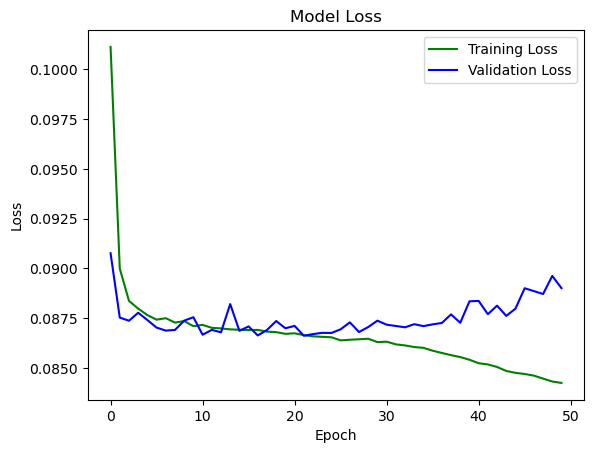

301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Mean Absolute Error: 12.465341544845248
Root Mean Squared Error: 14.415310936325927
Mean Absolute Percentage Error: 0.5043327590398987


In [15]:
# Assuming `df` is your traffic data DataFrame
cols = list(df)[2]  # Select the relevant column
training_data = df[cols].astype(float).values.reshape(-1, 1)  # Ensure data is numeric and reshape

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
training_scaled = scaler.fit_transform(training_data)

# Function to create sequences for time series
def split_sequences(sequences, n_steps):
    X, y = [], []
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix >= len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix], sequences[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Create sequences
n_steps = 24  # Using 24 hours as the step
X, Y = split_sequences(training_scaled, n_steps)

# Split into training and testing sets
t_d = len(training_scaled) // 5  # Define the test size
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=t_d / len(training_scaled), random_state=42)

# Reshape test_Y for compatibility
test_Y = test_Y.reshape(test_Y.shape[0], 1)

# Define the TCN model
input1 = Input(shape=(n_steps, 1), name='input1')
tcn1 = TCN(
    nb_filters=12,
    kernel_size=3,
    nb_stacks=1,
    dilations=(1, 2, 4, 8, 16),
    padding='causal',
    use_skip_connections=True,
    activation='relu'
)(input1)
output = Dense(1, activation='relu', name='output')(tcn1)
model = Model(inputs=input1, outputs=output)

# Compile the model
model.compile(optimizer="adam", loss="mse")
model.summary()

# Train the model
history = model.fit(train_X, train_Y, epochs=50, validation_split=0.24, verbose=2)

# Plot training history
plt.plot(history.history["loss"], color='green', label='Training Loss')
plt.plot(history.history["val_loss"], color='blue', label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Predict and inverse transform predictions
y_predict_scaled = model.predict(test_X)
y_predict = scaler.inverse_transform(y_predict_scaled)
test_Y = scaler.inverse_transform(test_Y)

# Evaluate the model
print("Mean Absolute Error:", mae(y_predict, test_Y))
print("Root Mean Squared Error:", sqrt(mse(y_predict, test_Y)))
print("Mean Absolute Percentage Error:", mape(y_predict, test_Y))

# Convert predictions to list for further analysis
predict = list(y_predict)